# Part 8 -- Latent Semantic Analysis

Transformation pipelines for LSA - vectorizing text data and Singular Value Decomposition (SVD)

**Load lib codes**

In [1]:
from os import chdir
chdir('/home/jovyan/work/Portfolio/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()

In [7]:
X = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/4.X.pickle')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import text 

In [4]:
# additional_stop_words = ('rt', 'amp', 'freddiethekat', 'says')
# stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [9]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=20, stop_words='english')
X_tfidf = tfidf.fit_transform(X['cleaned_text'])

In [10]:
joblib.dump(tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/8.tfidf_vectorizer.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data/8.tfidf_vectorizer.pickle']

In [11]:
joblib.dump(X_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/8.X_tfidf.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data/8.X_tfidf.pickle']

**Pick a larger number of n_components for SVD to see how many we want to use in our final pipeline**<br>
Scroll down to the pipeline and edit n_components based on this information. 

In [8]:
SVD = TruncatedSVD(n_components=300, random_state=42)
SVD_tfidf = SVD.fit_transform(X_tfidf)

In [9]:
joblib.dump(SVD_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.SVD_tfidf.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.SVD_tfidf.pickle']

In [10]:
joblib.dump(SVD, '../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.SVD_transformer.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.SVD_transformer.pickle']

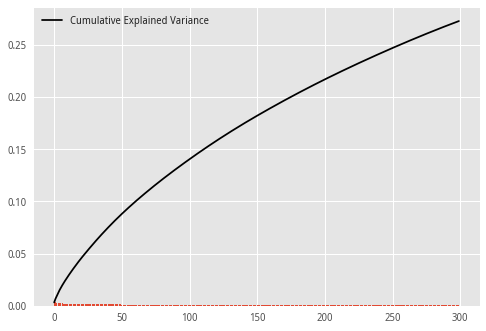

In [11]:
x = list(range(len(SVD.explained_variance_ratio_)))
plt.plot(x, np.cumsum(SVD.explained_variance_ratio_), label='Cumulative Explained Variance', color='black')
plt.bar(x, SVD.explained_variance_ratio_)
plt.legend()
# plt.ylim(0,.05)

In [12]:
np.cumsum(SVD.explained_variance_ratio_)[290:]

array([ 0.26830865,  0.26880903,  0.2693076 ,  0.26980491,  0.27029888,
        0.27079282,  0.27128449,  0.27177349,  0.27225836,  0.2727427 ])

With 100 SVD n_components, we can only account for 6% of the variance in the data. We need more.
With 300 SVD n_components, we can only account for 11% of the variance in the data.<br><br>
**Go back and clean data to see if we can capture more variance**<br>
Went back to clean data (picked better Twitter accounts) and we got a better score, with 300 SVD n_components accounting for 27% of the variance in the data.

**Run transformed data into tSNE**

In [14]:
!pip install bhtsne

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
import bhtsne

In [30]:
TSNE_tfidf = bhtsne.tsne(X_tfidf)

ValueError: Buffer has wrong number of dimensions (expected 2, got 1)

In [14]:
type(SVD_tfidf)

numpy.ndarray

In [16]:
type(X_tfidf.data)

numpy.ndarray

In [9]:
embedding_array = bhtsne.run_bh_ts

(77285, 6369)

In [61]:
start = datetime.now()

TSNE_SVD_tfidf = tsne(SVD_tfidf)

end = datetime.now()
print(end - start)

1:02:23.184251


In [70]:
# joblib.dump(TSNE_SVD_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.TSNE_SVD_tfidf.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.TSNE_SVD_tfidf.pickle']

In [ ]:
# start = datetime.now()

# TSNE_tfidf = tsne(X_tfidf.data)

# end = datetime.now()
# print(end - start)

In [ ]:
joblib.dump(TSNE_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.TSNE_tfidf.pickle')